### Data <a id="data"></a>

In [1]:
# Loading the dataset
from sklearn.datasets import load_boston
dataset = load_boston()

In [2]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
# Dataset description 
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:

import pandas as pd
# COnverting the dataset into pandas DataFrame
df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
df['MEDV'] = dataset.target

print(df.shape)

df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Statistics <a id="data_stats"></a>

In [6]:
# statistics of data including the central tendency, dispersion and shape of the dataset’s distribution.
df.describe().T
#print(df.shape)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
# Checking for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### Exploratory Data Analysis <a id="data_exp"></a>

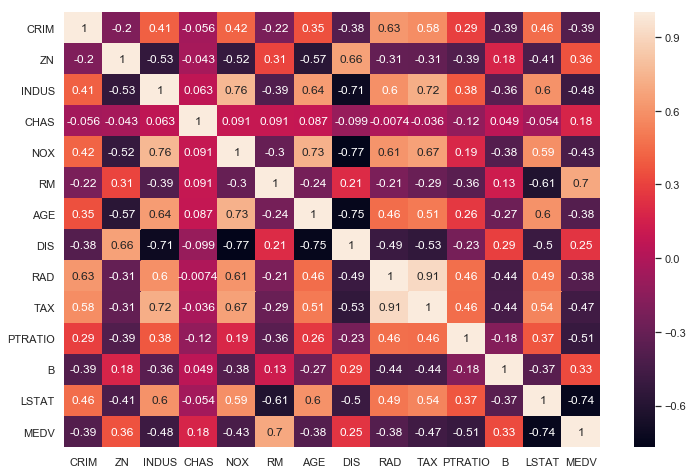

In [9]:
# correlation among features.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})

correlation_matrix = df.corr()
sns.heatmap(data= correlation_matrix, annot=True)

OBSERVATIONS:
    1) LSTAT and RM have highest correlation with the target variable. 
    Therefore, we definitely consider them. 
    2) TAX and RAD have very high correlation (0.91). 
    Therefore, we can remove one of them. 
    RAD has lesser correlation with the target variable compared to TAX. 
    Therefore, we can remove RAD. 
    

<Figure size 36000x720 with 0 Axes>

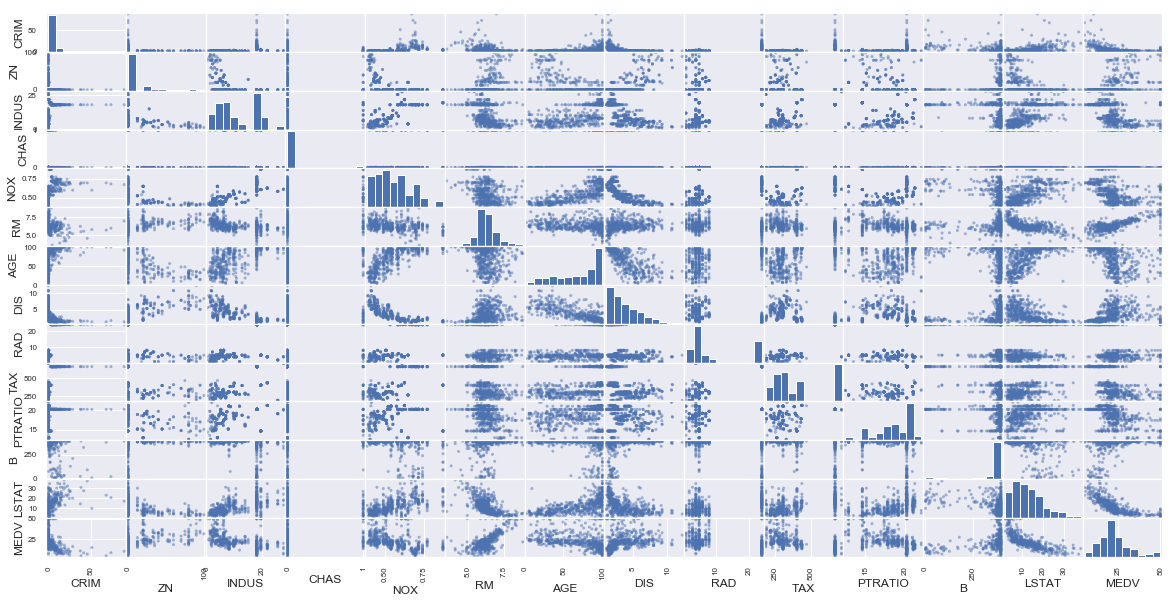

In [10]:
# Variation betwen 2 features with he target variable
from pandas.plotting import scatter_matrix
plt.figure(figsize=(500, 10))
scatter_matrix(df,figsize=(20, 10))
plt.show()

- The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.
- The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.

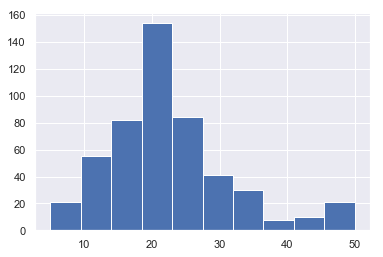

In [11]:
# distribution of the target variable MEDV.
df['MEDV'].hist()

### Data Preparation <a id="data_prep"></a>

In [12]:
# predictor variable 'X' and target variable 'y'.
X = df.drop('MEDV', axis=1)
Y = df['MEDV']

In [13]:
# Splitting the data into training set with 80% of the samples and test set with the remaining 20%.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train.shape

(404, 13)

### Linear regression  <a id="LR"></a>

In [19]:
# linear regression parameters including the linear regression intercept and the linear regression coefficient
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercept: \n', lin_reg.intercept_ )
print('Coefficient(s): \n',lin_reg.coef_ )

Intercept: 
 22.611881188118804
Coefficient(s): 
 [-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]


&#x270d; Measure r2 score over the training/test sets.

In [20]:
# Measure r2 score over the training/test sets.
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

from sklearn.metrics import r2_score
print('r2 score for training set:', r2_score(y_train,y_train_pred))
print('r2 score for test set:', r2_score(y_test, y_test_pred))

r2 score for training set: 0.7730135569264234
r2 score for test set: 0.5892223849182514
